<p id="part2"></p>

# <span style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #FF8C00">1 IMPORTING LIBRARIES</span>
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.0; color: rgba(0,0,0,.7)"><strong>LIBRARIES:</strong></p>

<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Library <strong>pandas</strong> will be required to work with data in tabular representation.</li>
<p></p>
<li>Library <strong>numpy</strong> will be required to round the data in the correlation matrix.</li>
<p></p>
<li>Library <strong>fuzzywuzzy</strong> will be needed to replace the same values but different in writing.</li>
<p></p>
<li>Library <strong>missingno</strong> will be required to visualize missing values in the data.</li>
<p></p>
<li>Library <strong>collections</strong> will be required to count the values in the list.</li>
<p></p>    
<li>Library <strong>matplotlib, seaborn, plotly</strong> required for data visualization.</li>
<p></p>
<li>Library <strong>scipy</strong> will be required to test hypotheses.</li>
<p></p>
</ol>

In [38]:
import pandas as pd
import numpy as np
import missingno
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

<p id="part3"></p>

# <span style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #FF8C00">2 DATA DESCRIPTION AND DATA CLEANING</span>
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In this block, exploratory data analysis will be carried out, data types, missing values, duplicates, measures of the central trend, and also the relationship between variables will be described.</p>

<p id="part4"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.1 Data types</p>

In [39]:
# Reading data
bestsellers = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv') # Loading data
bestsellers.head() # Displaying the first 5 lines of the dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [40]:
# Let's look at the dimension of the data
print(f'Data contain {bestsellers.shape[0]} records and {bestsellers.shape[1]} columns.')

Data contain 550 records and 7 columns.


In [41]:
# Let's deduce data types
bestsellers.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Data contains 3 categorical columns and 4 columns contains numeric values. Let's convert the genre to the category data type, leaving the year as a number.</p>

In [42]:
# Change the data type
bestsellers.Genre = bestsellers.Genre.astype('category')

<p id="part5"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.2 Missing values</p>

<p style = "font-family: Inter, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)"> Let's calculate the percentage of blanks and filled values for all columns.</p>

In [43]:
# loop through the columns and check the missing values
for col in bestsellers.columns:
    pct_missing = bestsellers[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%


<p style = "font-family: Inter, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Visualizing missing values.</p>

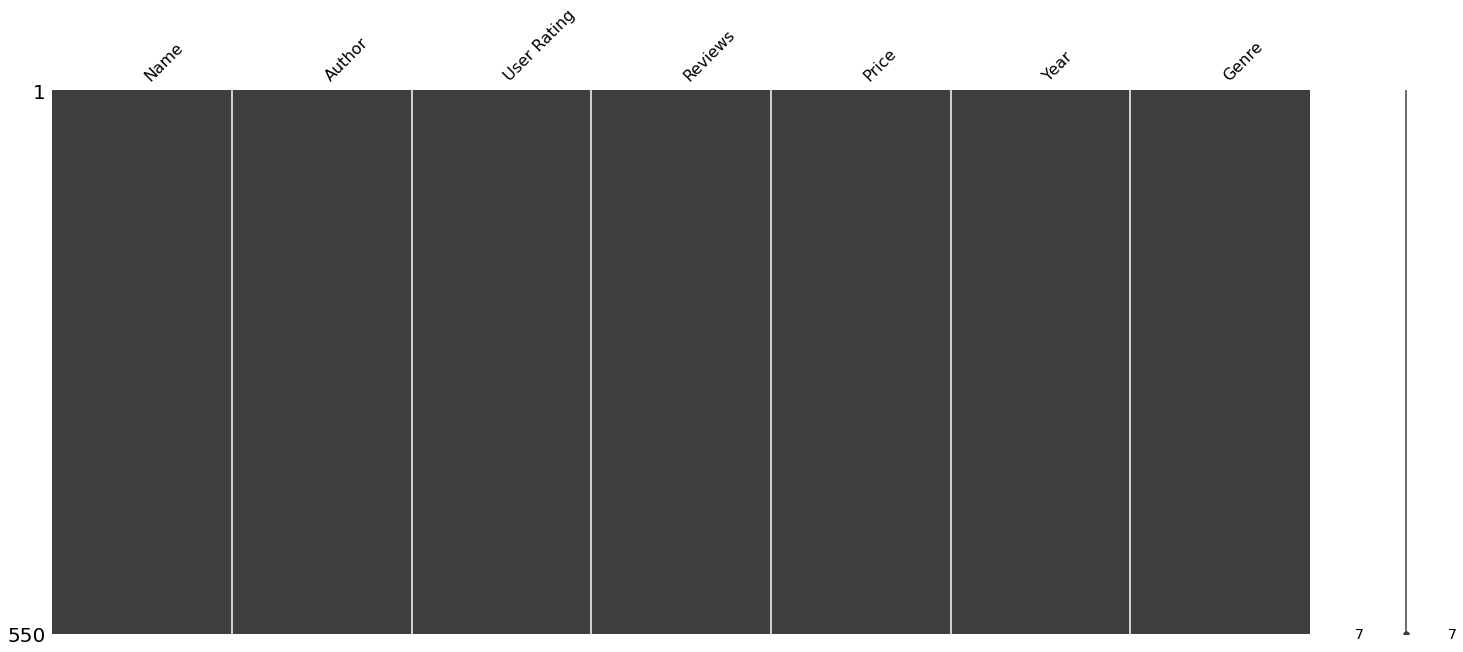

In [44]:
# Build a matrix of missing values
missingno.matrix(bestsellers, fontsize = 16)
plt.show()

<div style="background: #DCDCDC"><p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>CONCLUSION:</strong> The data has no missing values, so no further transformations are required.</p></div>

<p id="part6"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.3 Duplicates</p>

In [45]:
# Forming categorical columns
col_name_without_numeric_data = list(bestsellers.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')

Сolumns without numeric data: Name, Author, Genre.


In [46]:
# Let's see the duplicates in the columns
for col in col_name_without_numeric_data:
    #check all duplicated, if duplicate then mark the first one false, then second one true.
    # any means is there  at least two true here. if no true then no duplicates.
    if bestsellers[col].duplicated().any()== True:
        print (f'Column {col} contains duplicates.')
    else:
        print (f'Column {col} does not contain duplicates.')

Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Check if the columns contains words in different case and extra spaces.</p>

In [47]:
# Check if spelling errors have been hit
#here it means maybe some contains extra col

for col in col_name_without_numeric_data:
      print(f'Before {col}: {len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name: 351 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Indeed, there were typing errors in the Name column. Let's fix it.</p>

In [48]:
# Correct the errors
bestsellers.Name = bestsellers.Name.str.title().str.strip()

In [49]:
# Check if the changes have passed
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Let's check if there are the same author names but with different spellings.</p>

In [50]:
# Check the column Autor
authors = bestsellers.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Names of authors George R. R. Martin, George R.R. Martin and J. K. Rowling, J.K. Rowling have different spellings although they are the same authors. Let's fix it.</p>

In [51]:
# Let's build a list of the most similar spellings
# scorer using different ratio
matches_author_name = fuzzywuzzy.process.extract('George R.R. Martin', authors, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

[('George R. R. Martin', 100),
 ('George R.R. Martin', 100),
 ('George Orwell', 53),
 ('Bill Martin Jr.', 52),
 ('Greg Mortenson', 52)]

In [52]:
# Replace the names of the authors with the correct ones
bestsellers = bestsellers.replace('George R. R. Martin', 'George R.R. Martin')
bestsellers = bestsellers.replace('J. K. Rowling', 'J.K. Rowling')

In [53]:
# Check if the changes have passed
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(bestsellers[col]))} After {col}: {len(set(bestsellers[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2


In [54]:
# Check the column Genre
genre = bestsellers.Genre.unique()
genre

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Everything is fine with genres.</p>

In [55]:
# Check the column Year
years = list(bestsellers.Year.unique())
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Everything is fine with years.</p>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In addition, there may be duplicate rows in the data. Let's display the last 5 lines of the dataframe.</p>

In [56]:
# Let's display the last 5 lines of the dataframe
bestsellers.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In addition, it is worth noting that there are duplicate rows in the data, but with different years. Let's remove duplicates. Let's leave the data without years for later analysis.</p>

In [57]:
# Delete the year column
del bestsellers['Year']

In [58]:
# Remove duplicates and check how many books are left in the data
bestsellers = bestsellers.drop_duplicates(keep='first')
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         361 non-null    object  
 1   Author       361 non-null    object  
 2   User Rating  361 non-null    float64 
 3   Reviews      361 non-null    int64   
 4   Price        361 non-null    int64   
 5   Genre        361 non-null    category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 17.4+ KB


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">We received 11 more books than they actually have. Let's see why duplication occurs.</p>

In [59]:
# Let's count the number of each book in the data
count_books = collections.Counter(bestsellers.Name.tolist())
print(count_books.most_common(11))

[('The Help', 3), ('Gone Girl', 2), ("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2), ('The 5 Love Languages: The Secret To Love That Lasts', 2), ('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change', 2), ('The Fault In Our Stars', 2), ('The Girl On The Train', 2), ('The Immortal Life Of Henrietta Lacks', 2), ('To Kill A Mockingbird', 2), ('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2), ('10-Day Green Smoothie Cleanse', 1)]


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Сheck with the example of a book <strong>The Help</strong>.</p>


In [60]:
# Display information on the book The Help
bestsellers[bestsellers['Name'] == 'The Help']

,Name,Author,User Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Records are duplicated by price. Apparently, in different years the book costs differently, which is quite logical taking into account inflation, demand, etc. Let's leave only the last entries.</p>

In [61]:
# Drop duplicates keep the most recent year
bestsellers = bestsellers.drop_duplicates(subset='Name', keep='last')
bestsellers

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


<div style="background: #DCDCDC"><p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>CONCLUSION:</strong> Thus, the data contains 350 different books written by 246 authors. All books are presented in two categories (Non Fiction, Fiction).</p></div>

<p id="part7"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.4 Categorical data</p>
<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In this section, we will analyze categorical data and answer the following questions:</p>
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Which author's books receive the highest average rating (top authors).</li>
<p></p>
<li>Which author has written the most bestsellers (top authors).</li>
<p></p>
<li>Which genres become bestsellers more often.</li>
<p></p>
<li>Which book has the most reviews (top books).</li>
<p></p>
</ol>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Let's create new dataframes based on the average rating of authors, the number of books written by authors, the number of reviews for books and the number of books by genre. We visualize the received information.</p>

In [62]:
# We take all authors with the highest average rating
# \ is indentation, continue to next physical line
top_13_autors = bestsellers.groupby('Author')[['User Rating']].mean()\
                                                              .sort_values('User Rating', ascending=False)\
                                                              .head(13)\
                                                              .reset_index()
# We take the authors who have written the most bestsellers
number_of_books_written = bestsellers.groupby('Author')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

# We take books with the number of reviews
books_with_the_number_of_reviews = bestsellers.groupby('Name')[['Reviews']].sum()\
                                                                           .sort_values('Reviews', ascending=False)\
                                                                           .head(5)\
                                                                           .reset_index()

# We take the number of books by genre
number_of_books_by_genre = bestsellers.groupby('Genre')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

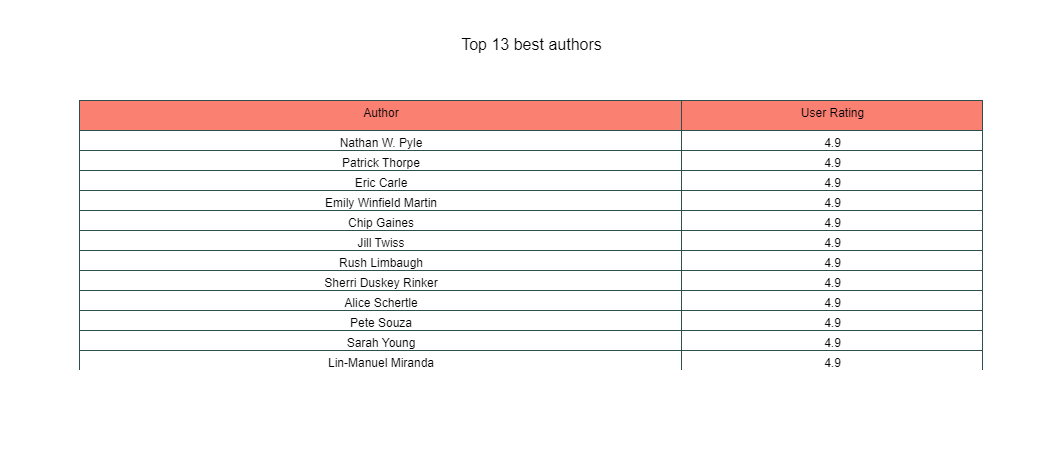

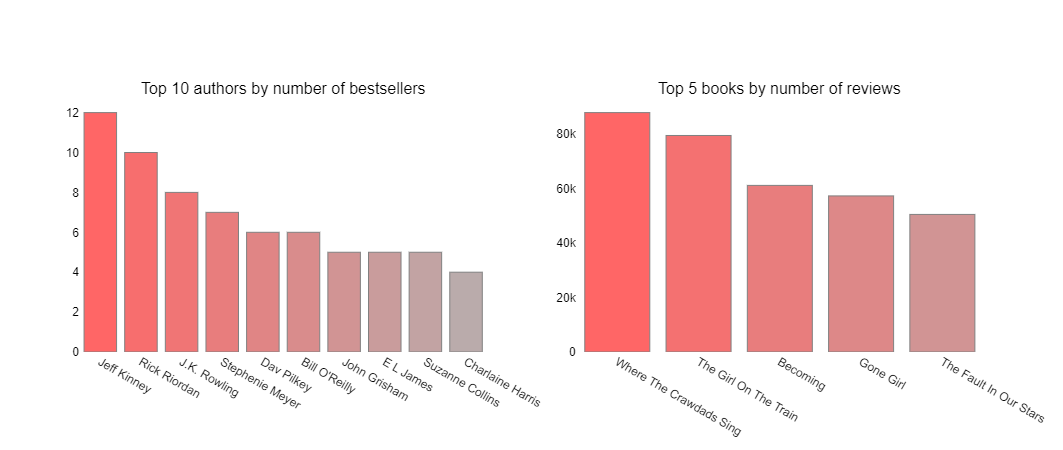

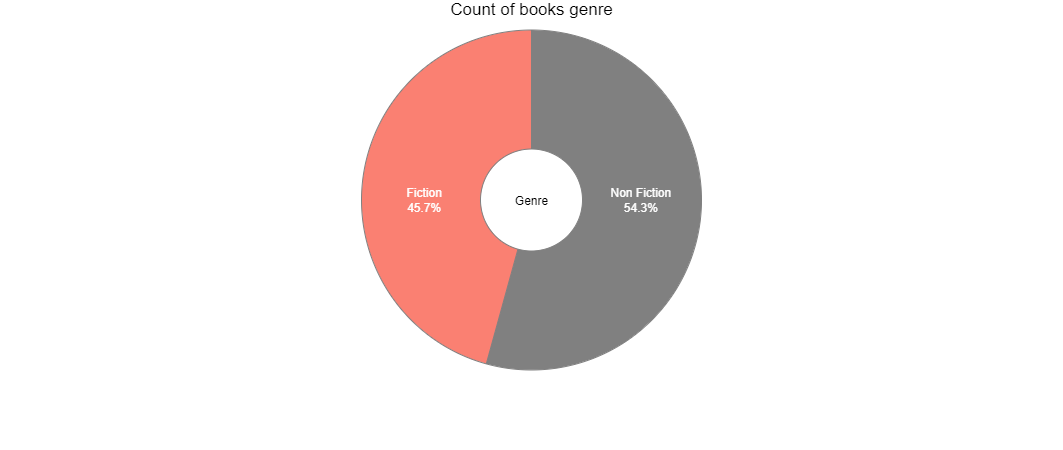

In [63]:
# Let's set the visualization parameters
fig_1 = make_subplots(rows=1, cols=1, subplot_titles=("")) # Let's set the number of rows and columns


# Setting table parameters
fig_1.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [100,50],
                         header=dict(values=top_13_autors.columns, 
                                     line_color='darkslategray',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[top_13_autors['Author'],
                                    top_13_autors['User Rating']], 
                                    line_color='darkslategray',
                                    fill_color='White')))

# Setting the parameters of the chart when displaying
fig_1.update_layout(showlegend=False, 
                    title_text='Top 13 best authors', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_1.show()

# Let's set the visualization parameters
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Top 10 authors by number of bestsellers", 
                                      "Top 5 books by number of reviews"))

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=number_of_books_written['Author'], 
                       y=number_of_books_written['Name'],
                       name ='Count books',
                       marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                       row=1, col=1)

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=books_with_the_number_of_reviews['Name'], 
                       y=books_with_the_number_of_reviews['Reviews'],
                       marker_color=['#ff6666','#f47171', '#e87d7d', '#dd8888', '#d19494'],
                       name ='Reviews'),
                       row=1, col=2)

# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_color='Gray',
                    marker_line_width=1)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_2.show()

# Let's set the visualization parameters
fig_3 = make_subplots(rows=1, cols=1,
                      specs=[[{'type': 'domain'}]],
                      subplot_titles=(""))

# Setting Pie parameters
fig_3.add_trace(go.Pie(values=number_of_books_by_genre['Name'],
                       title='Genre',
                       labels=['Non Fiction', 'Fiction'],
                       textinfo='label+percent',
                       insidetextorientation='radial',
                       hole=0.3,
                       marker=dict(colors=['Gray','Salmon'], 
                                   line_color='Gray', 
                                   line_width=1),
                       textfont={'color': '#FFFFFF', 'size': 12},
                       textfont_size=12))

# Setting the parameters of the chart when displaying
fig_3.update_layout(margin_t=30, 
                    showlegend=False, 
                    title_text='Count of books genre', 
                    title_x=0.5, 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_3.show()

<div style="background: #DCDCDC">
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>INSIGHT:</strong> By analyzing the categorical data, it is established:</p>
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>The following 13 authors have the highest rating: Nathan W. Pyle, Patrick Thorpe, Eric Carle, Emily Winfield Martin, Chip Gaines, Jill Twiss, Rush Limbaugh, Sherri Duskey Rinker, Alice Schertle, Pete Souza, Sarah Young, Lin-Manuel Miranda, Bill Martin Jr., Dav Pilkey. The average rating for their works was 4.9. When buying a new book, you should pay attention to these authors.</li>
<p></p>
<li>Authors who have written more bestsellers: Jeff Kinney - 12 books, Rick Riordan - 10 books, J.K. Rowling - 8 books, Stephenie Meyer - 7 books, Dav Pilkey - 6 books, Bill O'Reilly - 6 books, John Grisham - 5 books, E L James - 5 books, Suzanne Collins - 5 books, Charlaine Harris - 4 books. These authors always have something to read.</li>
<p></p>
<li>Books with the most reviews: Where The Crawdads Sing - 87841 Reviews, The Girl On The Train - 79446 Reviews, Becoming - 61133 Reviews, Gone Girl - 57271 Reviews, The Fault In Our Stars - 50482 Reviews. It's definitely worth reading the book Where The Crawdads Sing, it's not for nothing that it is the most talked about.</li>
<p></p>
<li>Non-fiction is more likely to become a bestseller. Later we will find out how users relate to these genres.</li>
<p></p>
</ol>        
</div>

<p id="part8"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">2.5 Numeric data</p>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Let's look at the measures of the central trend that characterize the distribution of numerical values in the data. We render a box-plot for each numeric variable.</p>

In [64]:
# Displaying measures of the central trend
bestsellers.describe()

,User Rating,Reviews,Price
count,350.000000,350.000000,350.000000
mean,4.608857,9804.605714,12.925714
std,0.226993,10885.017686,10.003161
min,3.300000,37.000000,0.000000
25%,4.500000,3435.250000,7.250000
50%,4.600000,6328.000000,11.000000
75%,4.800000,11510.250000,16.000000
max,4.900000,87841.000000,105.000000


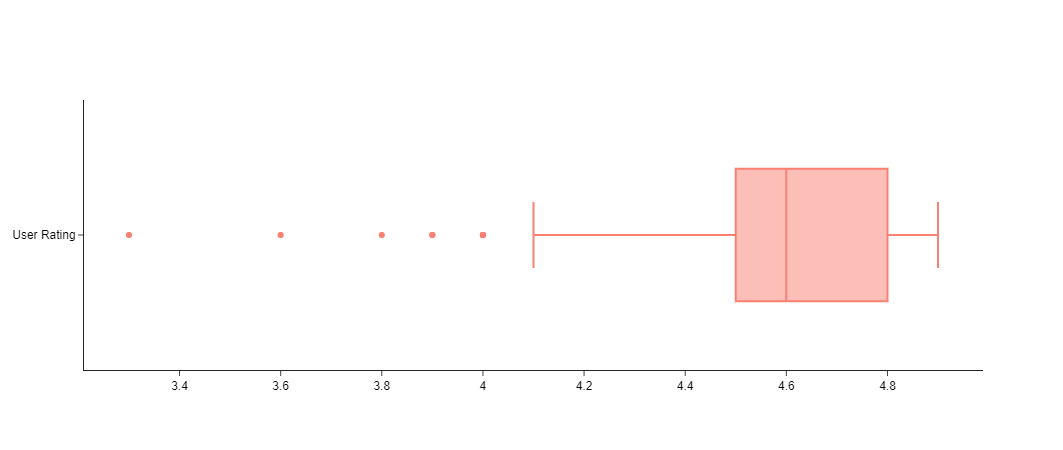

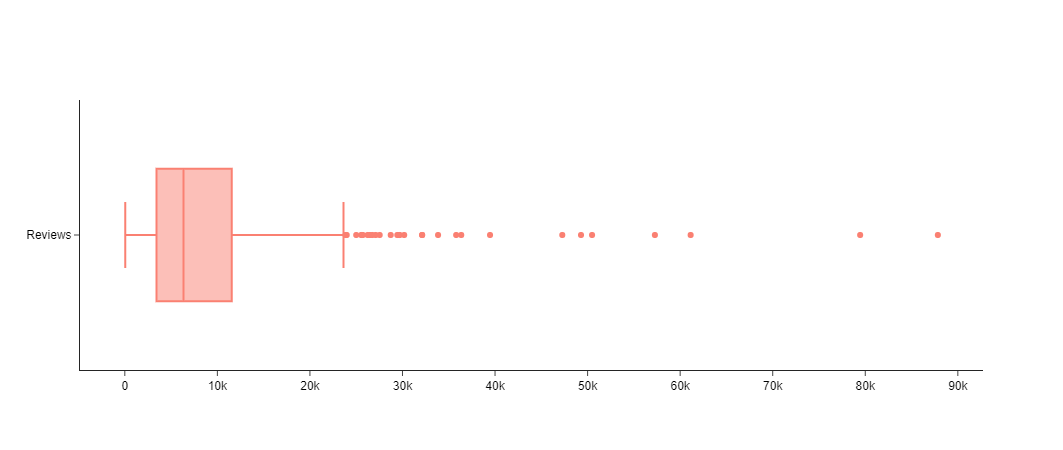

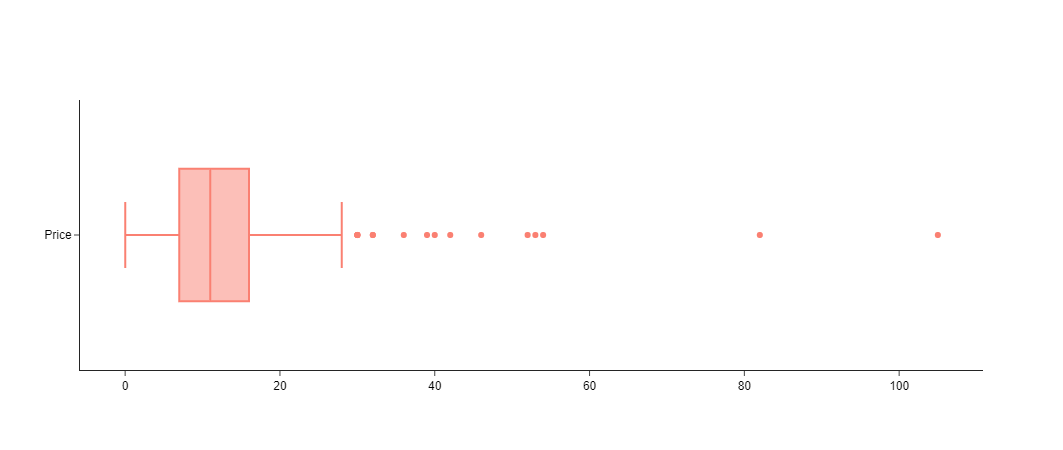

In [65]:
# Let's set the visualization parameters
fig_4 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_4.add_trace(go.Box(x=bestsellers['User Rating'], 
                       name='User Rating'))

# Setting the parameters of the Box when displaying
fig_4.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_4.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_4.show()

# Let's set the visualization parameters
fig_5 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_5.add_trace(go.Box(x=bestsellers['Reviews'], 
                       name='Reviews'))

# Setting the parameters of the Box when displaying
fig_5.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_5.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_5.show()

# Let's set the visualization parameters
fig_6 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_6.add_trace(go.Box(x=bestsellers['Price'], 
                       name='Price'))

# Setting the parameters of the Box when displaying
fig_6.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_6.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_6.show()

<div style="background: #DCDCDC">
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>INSIGHT:</strong> By analyzing the numeric data, it is established:</p>
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>User Rating:</strong></p>   
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>Average and median book ratings are 4.6.</li>
<p></p>
<li>There are outliers in the data. There are a small number of books in the data below the 4.1 rating.</li>
<p></p>
</ol>    
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>Reviews:</strong></p>  
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>The data has a wide range.</li>
<p></p>
<li>There are outliers in the data. There are a small number of books receiving reviews well above the 75 percentile.</li>
<p></p>
</ol> 
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>Price:</strong></p>  
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>There are books that cost much higher than the average, as well as books with a cost of 0, which is strange.There are books that cost much higher than the average, as well as books with a cost of 0, which is strange. Either the book is given for free or this error.</li>
<p></p>
</ol> 
</div>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Let's look at the correlation in the data.</p>

In [66]:
# Building a correlation matrix and building a correlation matrix and visualizing relationships
bestsellers.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.055478,-0.028228
Reviews,-0.055478,1.000000,-0.045705
Price,-0.028228,-0.045705,1.000000


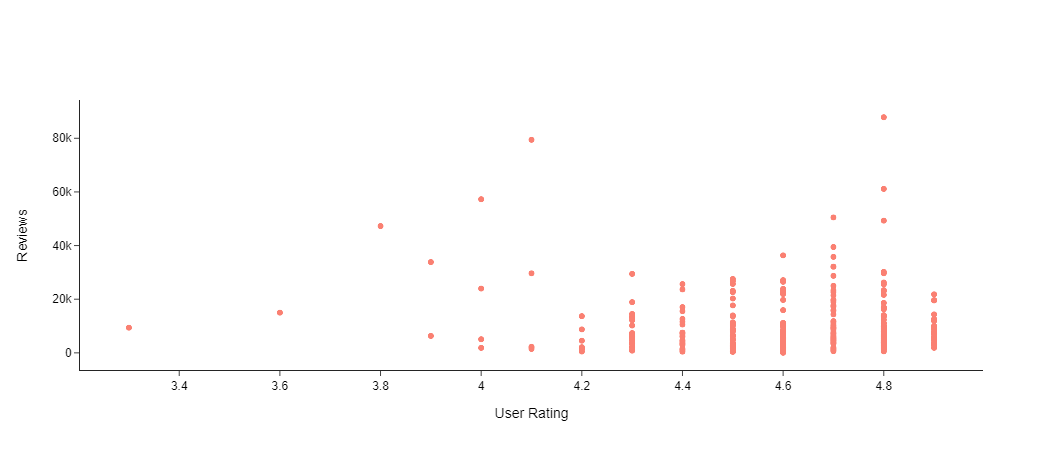

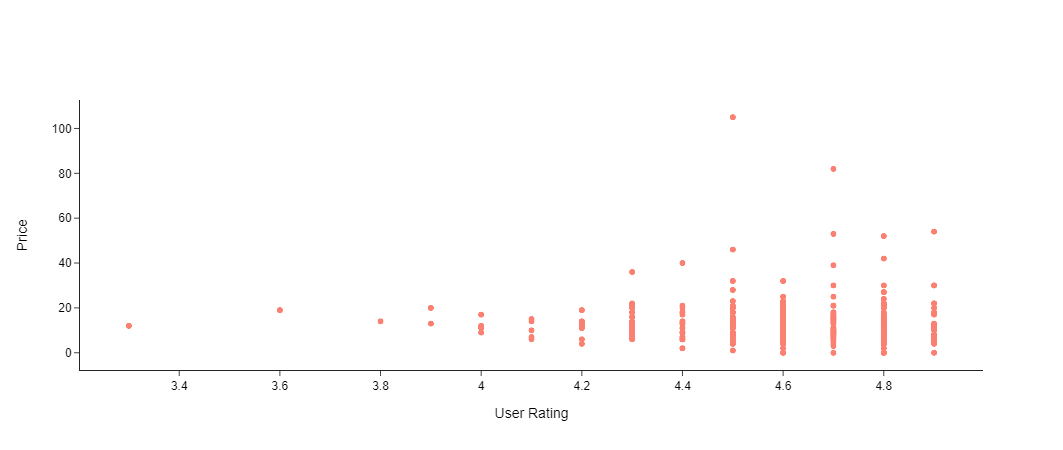

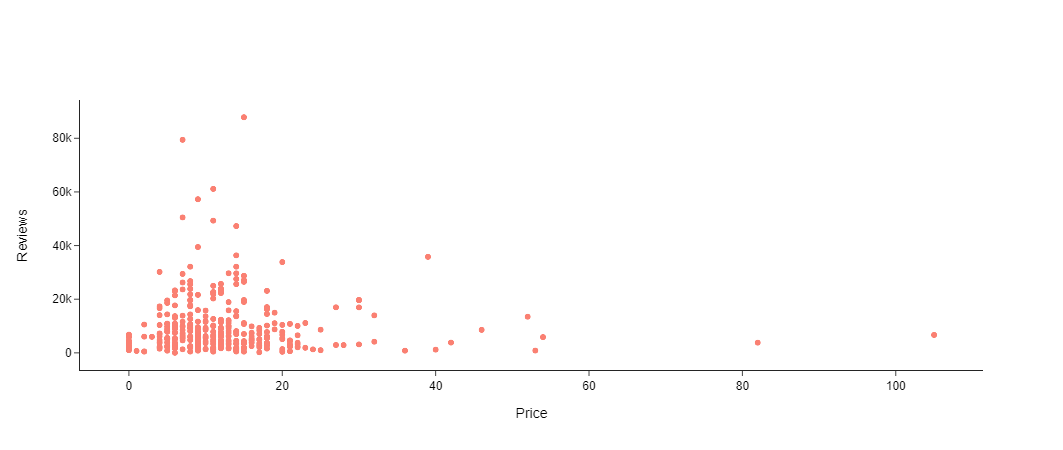

In [67]:
# Let's set the visualization parameters
fig_7 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_7.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_7.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_7.show()

# Let's set the visualization parameters
fig_8 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_8.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Price'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_8.update_layout(template='simple_white',
                    showlegend=False,
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Price'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_8.show()

# Let's set the visualization parameters
fig_9 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_9.add_trace(go.Scattergl(x=bestsellers['Price'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_9.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'Price'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', size=12, color='black'))

# Displaying the Scatter
fig_9.show()

<div style="background: #DCDCDC">
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>INSIGHT:</strong> Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data does not contain any positive or negative linear relationship between the rating, reviews and the price of books.</p>
</div>

<p id="part9"></p>

# <span style="font-family: Arials; font-size: 16px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #FF8C00">3 TESTING HYPOTHESES</span>
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In this article, let us test the following hypothesis: "Do genres differ in terms of rating?".</p>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)"><strong>We will test the hypothesis according to the following algorithm:</strong></p>
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Null and alternative hypotheses are formulated.</li>
<p></p>
<li>The distribution was checked for normality using "Shapiro Wilk test of normality".</li>
<p></p>
<li>Two samples were formed. Books related to the Non Fiction genre and books related to the Fiction genre.</li>
<p></p>
<li>Testing was carried out in order to identify statistical differences between the study groups.</li>
<p></p>
</ol>   


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">1. Let us formulate the null and alternative hypotheses.</p>
<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">H0 - There are no differences between genre racketeering</p>
<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">H1 - There are differences between genre racketeering</p>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">2. Checking the distribution for normality. Using "Shapiro Wilk test of normality".

In [68]:
# Set the alpha level
# checking if this is normally distributed.
alpha=0.05

# We pass groups to the criterion for testing
stat, pval = shapiro(bestsellers['User Rating'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
    
# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - Data is distributed normally.')
if pval < alpha:
    print('Reject H0 - Data is not distributed normally.')

Statistic: 0.877
P-Value: 0.00000000000000045166
Reject H0 - Data is not distributed normally.


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">3. Let's form two samples for testing.</p>

In [69]:
# Create group
non_fiction = bestsellers[bestsellers['Genre'] == 'Non Fiction']['User Rating']
fiction = bestsellers[bestsellers['Genre'] == 'Fiction']['User Rating']

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">4. Let's carry out testing. Since the nadi data in the samples are not normally distributed, we will use the nonparametric Mann-Whitney test.</p>

In [70]:
# Set the alpha level
alpha=0.05

# We pass groups to the criterion for testing
# data came from completely different groups. use manwhitney test to test the significant differences.
stat, pval = mannwhitneyu(non_fiction, fiction)

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
 
# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - There is no significant difference between the groups.')
if pval < alpha:
    print('Reject H0 - There are significant differences between the groups.')

Statistic: 13013.000
P-Value: 0.00931903468696572077
Reject H0 - There are significant differences between the groups.


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Let's compare the median values in the groups.</p>

In [71]:
print(f'Non_fiction median: {non_fiction.median()}, Fiction median: {fiction.median()}')

Non_fiction median: 4.6, Fiction median: 4.7


<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">Visualizing the density of distribution in samples.</p>

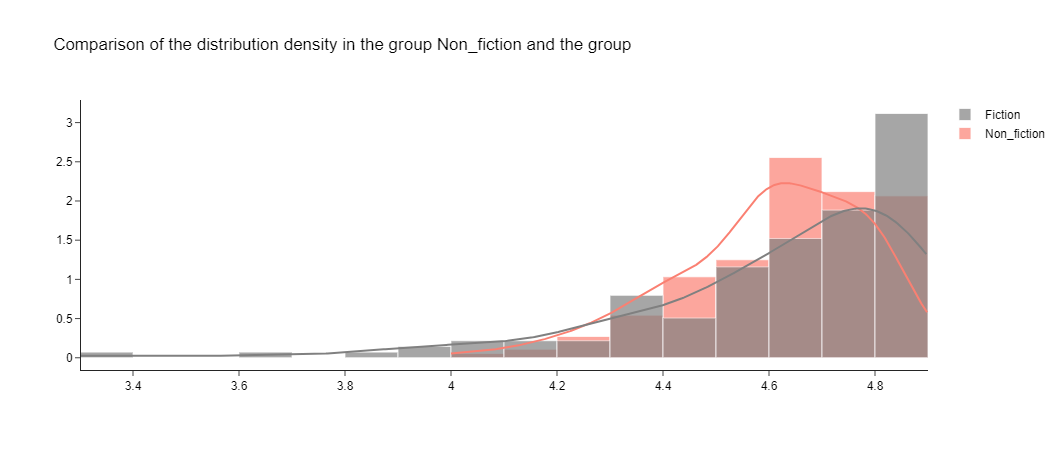

In [72]:
# Create distplot with curve_type set to 'normal'
fig_10 = ff.create_distplot([non_fiction, fiction], 
                         ['Non_fiction', 'Fiction'], 
                         colors=['salmon', 'gray',],
                         bin_size=.1, 
                         show_rug=False)

# Add title
fig_10.update_layout(title_text='Сomparison of the distribution density in the group Non_fiction and the group', 
                     template='simple_white',
                     font=dict(family='Arial', size=12, color='black'))
fig_10.show()

<div style="background: #DCDCDC">
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>INSIGHT:</strong> As a result of the testing, statistically significant differences were obtained between the compared groups. Based on the results obtained, it can be argued that users evaluate books differently depending on the genre, and based on the median values, readers give preference to works of fiction.</p>
</div>

<p id="part10"></p>

# <span style="font-family: Arials; font-size: 16px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #FF8C00">4 FINAL CONCLUSIONS</span>
<hr style="height: 0.5px; border: 0; background-color: #808080">

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)">In the course of the analysis, it was established which authors receive the highest ratings from readers, which authors have written the most bestsellers, which books receive the most reviews from readers. In addition, it was found that non-fiction literature is becoming more often a bestseller, but users also like fiction more, which is confirmed by the statistically significant results obtained during the testing.</p>